In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [200]:
df = pd.read_csv(r'D:\netflix_project\netflix_dataset.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [201]:
# number of unique values in each column
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [202]:
# null values in each column
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [203]:
# checking for datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [204]:
#unnesting directors column for movies, creating seperate lines for different directors 
#creating list of lists
l1 = df['director'].apply(lambda x : str(x).split(', ')).tolist()
l1

[['Kirsten Johnson'],
 ['nan'],
 ['Julien Leclercq'],
 ['nan'],
 ['nan'],
 ['Mike Flanagan'],
 ['Robert Cullen', 'José Luis Ucha'],
 ['Haile Gerima'],
 ['Andy Devonshire'],
 ['Theodore Melfi'],
 ['nan'],
 ['Kongkiat Komesiri'],
 ['Christian Schwochow'],
 ['Bruno Garotti'],
 ['nan'],
 ['nan'],
 ['Pedro de Echave García', 'Pablo Azorín Williams'],
 ['nan'],
 ['Adam Salky'],
 ['nan'],
 ['Olivier Megaton'],
 ['nan'],
 ['K.S. Ravikumar'],
 ['Alex Woo', 'Stanley Moore'],
 ['S. Shankar'],
 ['nan'],
 ['Rajiv Menon'],
 ['Dennis Dugan'],
 ['Scott Stewart'],
 ['Robert Luketic'],
 ['Ashwiny Iyer Tiwari', 'Abhishek Chaubey', 'Saket Chaudhary'],
 ['nan'],
 ['nan'],
 ['nan'],
 ['nan'],
 ['Daniel Sandu'],
 ['Cédric Jimenez'],
 ['nan'],
 ['George Nolfi'],
 ['nan'],
 ['nan'],
 ['Steven Spielberg'],
 ['Jeannot Szwarc'],
 ['Joe Alves'],
 ['Joseph Sargent'],
 ['Tyler Greco'],
 ['Daniel Espinosa'],
 ['Bunmi Ajakaiye'],
 ['Antoine Fuqua'],
 ['nan'],
 ['nan'],
 ['Toshiya Shinohara'],
 ['Toshiya Shinohara'],
 

In [205]:
df_dir1 = pd.DataFrame(l1, index=df['title'])
df_dir1

,0,1,2,3,4,5,6,7,8,9,10,11,12
title,,,,,,,,,,,,,
Dick Johnson Is Dead,Kirsten Johnson,None,None,None,None,None,None,None,None,None,None,None,None
Blood & Water,nan,None,None,None,None,None,None,None,None,None,None,None,None
Ganglands,Julien Leclercq,None,None,None,None,None,None,None,None,None,None,None,None
Jailbirds New Orleans,nan,None,None,None,None,None,None,None,None,None,None,None,None
Kota Factory,nan,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zodiac,David Fincher,None,None,None,None,None,None,None,None,None,None,None,None
Zombie Dumb,nan,None,None,None,None,None,None,None,None,None,None,None,None
Zombieland,Ruben Fleischer,None,None,None,None,None,None,None,None,None,None,None,None


In [206]:
df_dir1 = df_dir1.stack()
df_dir1

title                   
Dick Johnson Is Dead   0    Kirsten Johnson
Blood & Water          0                nan
Ganglands              0    Julien Leclercq
Jailbirds New Orleans  0                nan
Kota Factory           0                nan
                                 ...       
Zodiac                 0      David Fincher
Zombie Dumb            0                nan
Zombieland             0    Ruben Fleischer
Zoom                   0       Peter Hewitt
Zubaan                 0        Mozez Singh
Length: 9612, dtype: object

In [207]:
df_dir1 = pd.DataFrame(df_dir1.reset_index())
df_dir1

,title,level_1,0
0,Dick Johnson Is Dead,0,Kirsten Johnson
1,Blood & Water,0,nan
2,Ganglands,0,Julien Leclercq
3,Jailbirds New Orleans,0,nan
4,Kota Factory,0,nan
...,...,...,...
9607,Zodiac,0,David Fincher
9608,Zombie Dumb,0,nan
9609,Zombieland,0,Ruben Fleischer
9610,Zoom,0,Peter Hewitt


In [208]:
#renaming column 0 as directors
df_dir1.rename(columns = {0 : 'Directors'}, inplace=True)
df_dir1

,title,level_1,Directors
0,Dick Johnson Is Dead,0,Kirsten Johnson
1,Blood & Water,0,nan
2,Ganglands,0,Julien Leclercq
3,Jailbirds New Orleans,0,nan
4,Kota Factory,0,nan
...,...,...,...
9607,Zodiac,0,David Fincher
9608,Zombie Dumb,0,nan
9609,Zombieland,0,Ruben Fleischer
9610,Zoom,0,Peter Hewitt


In [209]:
# delete level_1 column
df_dir1.drop(['level_1'], axis = 1, inplace=True)
df_dir1

,title,Directors
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan
...,...,...
9607,Zodiac,David Fincher
9608,Zombie Dumb,nan
9609,Zombieland,Ruben Fleischer
9610,Zoom,Peter Hewitt


In [210]:
#similarly unnesting the cast column, that is creating separate lines for each cast member 
l2=df['cast'].apply(lambda x: str(x).split(', ')).tolist()
df_cast=pd.DataFrame(l2,index=df['title'])
df_cast=df_cast.stack()
df_cast=pd.DataFrame(df_cast.reset_index())
df_cast.rename(columns={0:'Actors'},inplace=True)
df_cast.drop('level_1',axis=1,inplace=True)
df_cast

,title,Actors
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
...,...,...
64946,Zubaan,Manish Chaudhary
64947,Zubaan,Meghna Malik
64948,Zubaan,Malkeet Rauni
64949,Zubaan,Anita Shabdish


In [211]:
#unnesting the listed_in column, that is creating separate lines for each genre 
l3=df['listed_in'].apply(lambda x: str(x).split(', ')).tolist()
df_genre=pd.DataFrame(l3,index=df['title'])
df_genre=df_genre.stack()
df_genre=pd.DataFrame(df_genre.reset_index())
df_genre.rename(columns={0:'Genre'},inplace=True)
df_genre.drop(['level_1'],axis=1,inplace=True)
df_genre

,title,Genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows
...,...,...
19318,Zoom,Children & Family Movies
19319,Zoom,Comedies
19320,Zubaan,Dramas
19321,Zubaan,International Movies


In [212]:
#unnesting the country column, that is reating separate lines for each country
l4=df['country'].apply(lambda x: str(x).split(', ')).tolist()
df_country=pd.DataFrame(l4,index=df['title'])
df_country=df_country.stack()
df_country=pd.DataFrame(df_country.reset_index())
df_country.rename(columns={0:'country'},inplace=True)
df_country.drop(['level_1'],axis=1,inplace=True)
df_country

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India
...,...,...
10840,Zodiac,United States
10841,Zombie Dumb,nan
10842,Zombieland,United States
10843,Zoom,United States


In [213]:
# merging director and actor dfs 
df_da = df_dir1.merge(df_cast, on = 'title')
df_da

,title,Directors,Actors
0,Dick Johnson Is Dead,Kirsten Johnson,nan
1,Blood & Water,nan,Ama Qamata
2,Blood & Water,nan,Khosi Ngema
3,Blood & Water,nan,Gail Mabalane
4,Blood & Water,nan,Thabang Molaba
...,...,...,...
70807,Zubaan,Mozez Singh,Manish Chaudhary
70808,Zubaan,Mozez Singh,Meghna Malik
70809,Zubaan,Mozez Singh,Malkeet Rauni
70810,Zubaan,Mozez Singh,Anita Shabdish


In [214]:
df_dag = df_da.merge(df_genre, on = 'title')
df_dag

,title,Directors,Actors,Genre
0,Dick Johnson Is Dead,Kirsten Johnson,nan,Documentaries
1,Blood & Water,nan,Ama Qamata,International TV Shows
2,Blood & Water,nan,Ama Qamata,TV Dramas
3,Blood & Water,nan,Ama Qamata,TV Mysteries
4,Blood & Water,nan,Khosi Ngema,International TV Shows
...,...,...,...,...
161211,Zubaan,Mozez Singh,Anita Shabdish,International Movies
161212,Zubaan,Mozez Singh,Anita Shabdish,Music & Musicals
161213,Zubaan,Mozez Singh,Chittaranjan Tripathy,Dramas
161214,Zubaan,Mozez Singh,Chittaranjan Tripathy,International Movies


In [215]:
df_dagc = df_dag.merge(df_country, on = 'title')
df_dagc

,title,Directors,Actors,Genre,country
0,Dick Johnson Is Dead,Kirsten Johnson,nan,Documentaries,United States
1,Blood & Water,nan,Ama Qamata,International TV Shows,South Africa
2,Blood & Water,nan,Ama Qamata,TV Dramas,South Africa
3,Blood & Water,nan,Ama Qamata,TV Mysteries,South Africa
4,Blood & Water,nan,Khosi Ngema,International TV Shows,South Africa
...,...,...,...,...,...
201986,Zubaan,Mozez Singh,Anita Shabdish,International Movies,India
201987,Zubaan,Mozez Singh,Anita Shabdish,Music & Musicals,India
201988,Zubaan,Mozez Singh,Chittaranjan Tripathy,Dramas,India
201989,Zubaan,Mozez Singh,Chittaranjan Tripathy,International Movies,India


In [216]:
#merging unnested data with original data
df_new1=df_dagc.merge(df[['show_id', 'type', 'title', 'date_added',
       'release_year', 'rating', 'duration']],on=['title'],how='left')
df_new1

,title,Directors,Actors,Genre,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,nan,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,nan,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,nan,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,nan,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,nan,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
...,...,...,...,...,...,...,...,...,...,...,...
201986,Zubaan,Mozez Singh,Anita Shabdish,International Movies,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
201987,Zubaan,Mozez Singh,Anita Shabdish,Music & Musicals,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
201988,Zubaan,Mozez Singh,Chittaranjan Tripathy,Dramas,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
201989,Zubaan,Mozez Singh,Chittaranjan Tripathy,International Movies,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min


In [217]:
df_new1.isna().sum()

title             0
Directors         0
Actors            0
Genre             0
country           0
show_id           0
type              0
date_added      158
release_year      0
rating           67
duration          3
dtype: int64

In [218]:
#checking the occurences of each of the ratings
df_new1['rating'].value_counts()

rating
TV-MA       73867
TV-14       43931
R           25860
PG-13       16246
TV-PG       14926
PG          10919
TV-Y7        6304
TV-Y         3665
TV-G         2779
NR           1573
G            1530
NC-17         149
TV-Y7-FV       86
UR             86
74 min          1
84 min          1
66 min          1
Name: count, dtype: int64

By looking at the above table last three rows does not make sense for rating column, since there are 3 null values in duration column, we can replace with corresponding values in rating column

In [219]:
df_new1.loc[df_new1['duration'].isna(),'duration'] = df_new1.loc[df_new1['duration'].isna(),'duration'].fillna(df_new1['rating'])
df_new1.isna().sum()

title             0
Directors         0
Actors            0
Genre             0
country           0
show_id           0
type              0
date_added      158
release_year      0
rating           67
duration          0
dtype: int64

In [220]:
df_new1['rating'].value_counts()

rating
TV-MA       73867
TV-14       43931
R           25860
PG-13       16246
TV-PG       14926
PG          10919
TV-Y7        6304
TV-Y         3665
TV-G         2779
NR           1573
G            1530
NC-17         149
TV-Y7-FV       86
UR             86
74 min          1
84 min          1
66 min          1
Name: count, dtype: int64

In [221]:
#since rating cannot be in minutes, we convert it into NR
df_new1.loc[df_new1['rating'].str.contains('min', na=False),'rating']='NR'
df_new1['rating'].fillna('NR',inplace=True)
df_new1.isna().sum()

title             0
Directors         0
Actors            0
Genre             0
country           0
show_id           0
type              0
date_added      158
release_year      0
rating            0
duration          0
dtype: int64

In [222]:
df_new1['country'].value_counts()

country
United States     59349
India             22814
United Kingdom    12945
nan               11897
Japan              8679
                  ...  
Palestine             2
Kazakhstan            1
Nicaragua             1
United States,        1
Uganda                1
Name: count, Length: 128, dtype: int64

In [223]:
#date added column is imputed on the basis of release year,i.e- suppose there's a null for date_added
#when release year was i.So below piece of code just checks the mode of date added for release year=i and imputes in place of nulls the corresponding mode

for i in df_new1[df_new1['date_added'].isnull()]['release_year'].unique():
  imp=df_new1[df_new1['release_year']==i]['date_added'].mode().values[0]
  df_new1.loc[df_new1['release_year']==i,'date_added']=df_new1.loc[df_new1['release_year']==i,'date_added'].fillna(imp)

In [224]:
df_new1.isna().sum()

title           0
Directors       0
Actors          0
Genre           0
country         0
show_id         0
type            0
date_added      0
release_year    0
rating          0
duration        0
dtype: int64

In [225]:
#there are 11897 nan values in column 'country', we can replacce it by mode of the country of the director
for i in df_new1[df_new1['country']=='nan']['Directors'].unique():
    imp=df_new1[df_new1['Directors']==i]['country'].mode().values[0]
    df_new1.loc[df_new1['Directors']==i,'country']=df_new1.loc[df_new1['Directors']==i,'country'].replace(['nan'], imp)
  

In [226]:
df_new1['country'].value_counts()

country
United States     64529
India             23134
United Kingdom    12954
Japan              8711
France             8315
                  ...  
Palestine             2
Kazakhstan            1
Nicaragua             1
United States,        1
Uganda                1
Name: count, Length: 128, dtype: int64

In [227]:
df_new1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201991 entries, 0 to 201990
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   title         201991 non-null  object
 1   Directors     201991 non-null  object
 2   Actors        201991 non-null  object
 3   Genre         201991 non-null  object
 4   country       201991 non-null  object
 5   show_id       201991 non-null  object
 6   type          201991 non-null  object
 7   date_added    201991 non-null  object
 8   release_year  201991 non-null  int64 
 9   rating        201991 non-null  object
 10  duration      201991 non-null  object
dtypes: int64(1), object(10)
memory usage: 17.0+ MB


In [228]:
df_new1.head(5)

,title,Directors,Actors,Genre,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,nan,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,nan,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,nan,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,nan,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,nan,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [229]:
from datetime import datetime
from dateutil.parser import parse
arr=[]
for i in df_new1['date_added'].values:
  dt1=parse(i)
  arr.append(dt1.strftime('%Y-%m-%d'))
df_new1['Modified_Added_date'] =arr
df_new1['Modified_Added_date']=pd.to_datetime(df_new1['Modified_Added_date'])
df_new1['month_added']=df_new1['Modified_Added_date'].dt.month
df_new1['day of week']=df_new1['Modified_Added_date'].dt.weekday
df_new1['year']=df_new1['Modified_Added_date'].dt.year
df_new1.head()

,title,Directors,Actors,Genre,country,show_id,type,date_added,release_year,rating,duration,Modified_Added_date,month_added,day of week,year
0,Dick Johnson Is Dead,Kirsten Johnson,nan,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min,2021-09-25,9,5,2021
1,Blood & Water,nan,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,4,2021
2,Blood & Water,nan,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,4,2021
3,Blood & Water,nan,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,4,2021
4,Blood & Water,nan,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,4,2021


In [247]:
df_new1.groupby('type').agg({"title":"nunique"})

,title
type,
Movie,6131
TV Show,2676


There is a ratio of 70:30 of Movies and TV Shows

Q. Which countries produce the most content on Netflix?

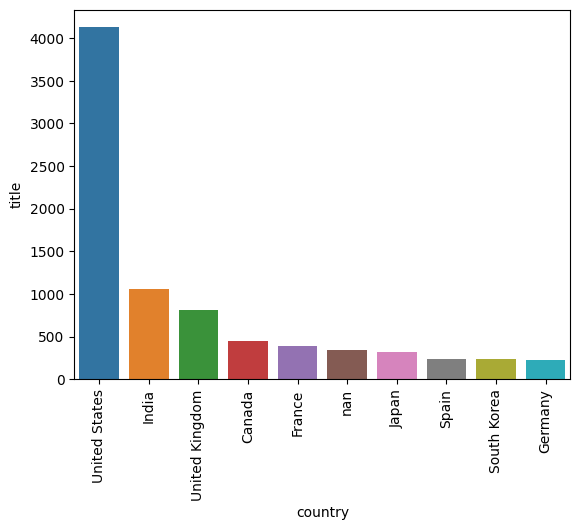

In [277]:
countries_w_most_content = df_new1.groupby('country').agg({"title":"nunique"}).reset_index().sort_values(by = ['title'],ascending = False)[:10]
countries_w_most_content
sns.barplot(data = countries_w_most_content, x = 'country', y = 'title')
plt.xticks(rotation=90)
plt.show()

60% of the content is produced by US, India, UK, Japan and France combined. US is the largest content provider.

Q. Number of distinct titles on the basis of rating

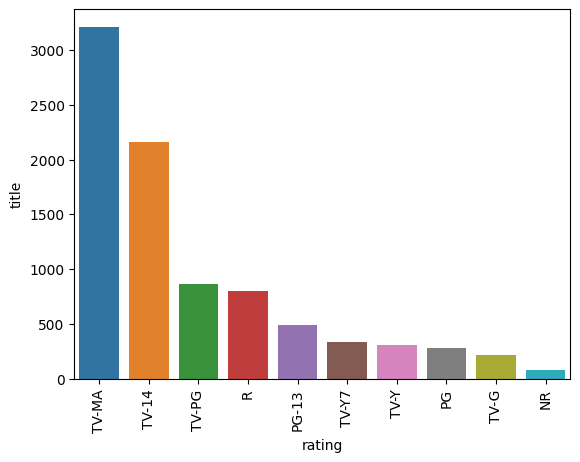

In [278]:
df_rating = df_new1.groupby('rating').agg({"title":"nunique"}).reset_index().sort_values(by = ['title'],ascending = False)[:10]
sns.barplot(data = df_rating , x = 'rating', y = 'title')
plt.xticks(rotation=90)
plt.show()

Most of the highly rated content on Netflix is intended for Mature Audiences, R Rated, content not intended for audience under 14 and those which require Parental Guidance

Q. Number of distinct titles on the basis of duration

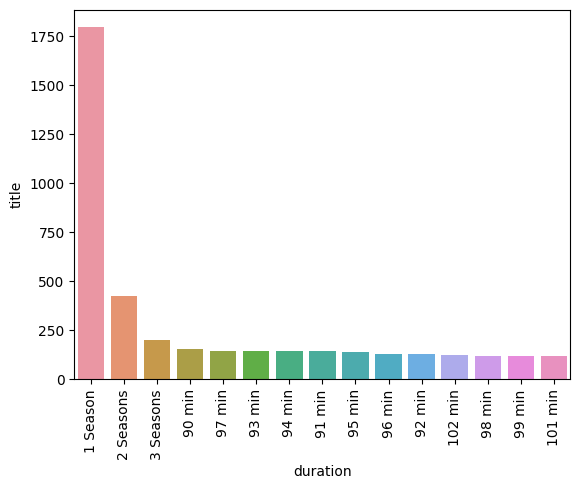

In [280]:
df_dur = df_new1.groupby(['duration']).agg({"title":"nunique"}).reset_index().sort_values(by = ['title'],ascending = False)[:15]
sns.barplot(data = df_dur , x = 'duration', y = 'title')
plt.xticks(rotation=90)
plt.show()

The duration of most watched content in the data is either TV shows with 1 season or 90-110 mins movies

In [237]:
df_new1.shape

(201991, 15)

Q. What is the best time to launch a Movie?
a. Find which is the best day of the week and month to release movie?

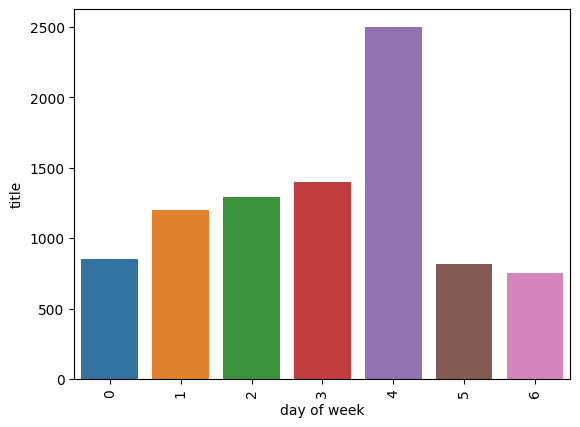

In [282]:
df_dow = df_new1.groupby('day of week').agg({"title":"nunique"}).reset_index().sort_values(by = ['title'],ascending = False)
sns.barplot(data = df_dow , x = 'day of week', y = 'title')
plt.xticks(rotation=90)
plt.show()

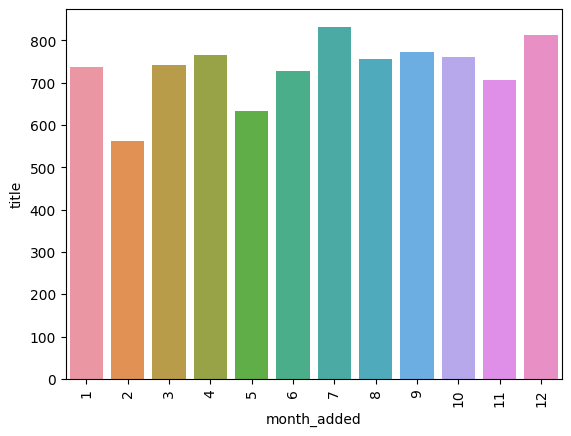

In [283]:
df_mon = df_new1.groupby('month_added').agg({"title":"nunique"}).reset_index().sort_values(by = ['title'],ascending = False)
sns.barplot(data = df_mon, x = 'month_added', y = 'title')
plt.xticks(rotation=90)
plt.show()

From the above plots, it can be said that more content is released on Friday's irrespective of month.

In [284]:
movies_df = df_new1.loc[df_new1['type'] == 'Movie']
tv_df = df_new1.loc[df_new1['type'] == 'TV Show']

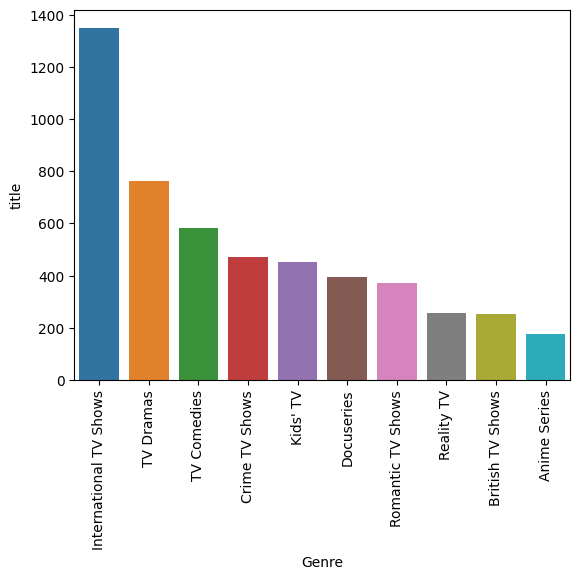

In [286]:
df_genre=tv_df.groupby(['Genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
sns.barplot(data = df_genre, x = 'Genre', y = 'title')
plt.xticks(rotation=90)
plt.show()

International Shows, Dramas and Comedy Genres are popular across TV Shows in Netflix

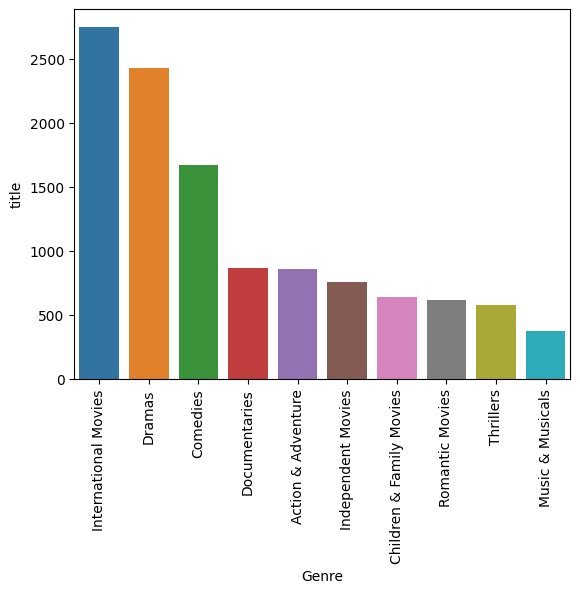

In [287]:
df_genre=movies_df.groupby(['Genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
sns.barplot(data = df_genre, x = 'Genre', y = 'title')
plt.xticks(rotation=90)
plt.show()

The most popular genre in movies are Internation Movies, Dramas and Comedies

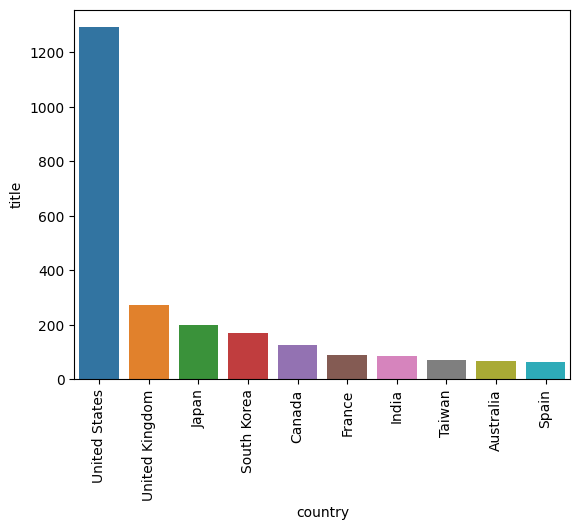

In [289]:
df_country=tv_df.groupby(['country']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
sns.barplot(data = df_country, x = 'country', y = 'title')
plt.xticks(rotation=90)
plt.show()

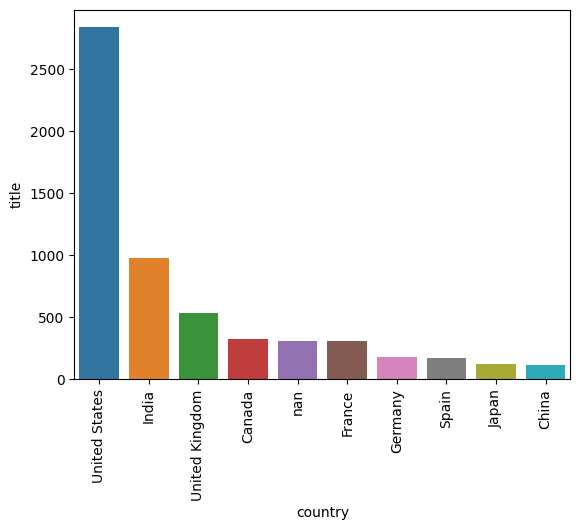

In [290]:
df_country=movies_df.groupby(['country']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
sns.barplot(data = df_country, x = 'country', y = 'title')
plt.xticks(rotation=90)
plt.show()

The United States excels in both TV shows and movies, while the UK contributes significantly to TV shows and movies. India is more prominent in movies than TV shows, with the sheer number of Indian movies surpassing the combined total of TV shows and movies from the UK.